In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from xgboost import XGBClassifier, plot_importance as xg_importance
from lightgbm import LGBMClassifier, plot_importance as lgb_importance

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('./creditcard.csv')

In [4]:
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.188326e-16,-1.164018e-15,-9.082889e-16,2.085924e-17,-6.343731e-16,-1.018099e-15,-2.557889e-16,-1.347621e-16,...,-2.444306e-16,-4.201199e-16,6.217312e-16,-4.385333e-17,-9.832396e-16,-1.745526e-17,1.196577e-16,2.108702e-15,-0.227709,-0.101347
V2,-0.010593,4.188326e-16,1.000000e+00,3.140164e-16,-1.125909e-15,5.230686e-16,2.781752e-16,1.857398e-16,-5.698764e-17,2.006267e-17,...,-8.277282e-17,1.547272e-16,1.668081e-16,1.577058e-17,-4.530958e-16,1.984817e-16,-4.938067e-16,-5.182198e-16,-0.531409,0.091289
V3,-0.419618,-1.164018e-15,3.140164e-16,1.000000e+00,4.644369e-16,-5.483554e-17,1.627805e-15,5.239200e-16,-1.297365e-15,5.725902e-16,...,5.931009e-17,-1.115726e-15,-5.063673e-16,5.605700e-19,-1.118857e-15,-1.389572e-16,1.058098e-15,9.792787e-16,-0.210880,-0.192961
V4,-0.105260,-9.082889e-16,-1.125909e-15,4.644369e-16,1.000000e+00,-1.722056e-15,-7.565957e-16,-4.188169e-16,5.645256e-16,6.873528e-16,...,-1.862123e-16,-3.949686e-17,9.564529e-17,1.569977e-16,6.026069e-16,-4.237973e-16,4.577343e-17,-3.888959e-18,0.098732,0.133447
V5,0.173072,2.085924e-17,5.230686e-16,-5.483554e-17,-1.722056e-15,1.000000e+00,2.208263e-16,2.691713e-16,7.396815e-16,7.178142e-16,...,-3.990893e-16,1.277735e-16,-8.760100e-18,-1.142295e-15,5.021165e-16,4.450164e-16,6.538203e-16,-3.301835e-18,-0.386356,-0.094974
V6,-0.063016,-6.343731e-16,2.781752e-16,1.627805e-15,-7.565957e-16,2.208263e-16,1.000000e+00,1.213776e-16,-1.030439e-16,4.234240e-16,...,5.551919e-17,5.756004e-18,9.443837e-17,-1.070899e-15,4.568884e-16,-1.402561e-16,-4.500879e-16,2.493919e-16,0.215981,-0.043643
V7,0.084714,-1.018099e-15,1.857398e-16,5.239200e-16,-4.188169e-16,2.691713e-16,1.213776e-16,1.000000e+00,3.549393e-16,1.125386e-15,...,-2.122235e-16,-8.840620e-16,-4.458969e-16,9.812896e-18,-2.881866e-16,-9.494990e-16,-1.723845e-15,-2.921030e-16,0.397311,-0.187257
V8,-0.036949,-2.557889e-16,-5.698764e-17,-1.297365e-15,5.645256e-16,7.396815e-16,-1.030439e-16,3.549393e-16,1.000000e+00,4.340695e-16,...,3.830431e-16,2.065947e-16,6.910016e-17,-9.701203e-17,-4.609097e-16,-1.777597e-16,1.280491e-16,-6.187506e-16,-0.103079,0.019875
V9,-0.008660,-1.347621e-16,2.006267e-17,5.725902e-16,6.873528e-16,7.178142e-16,4.234240e-16,1.125386e-15,4.340695e-16,1.000000e+00,...,1.874693e-16,-6.976879e-16,-5.221067e-16,-1.449529e-16,6.679328e-16,-8.154251e-16,-6.111140e-17,1.106537e-15,-0.044246,-0.097733


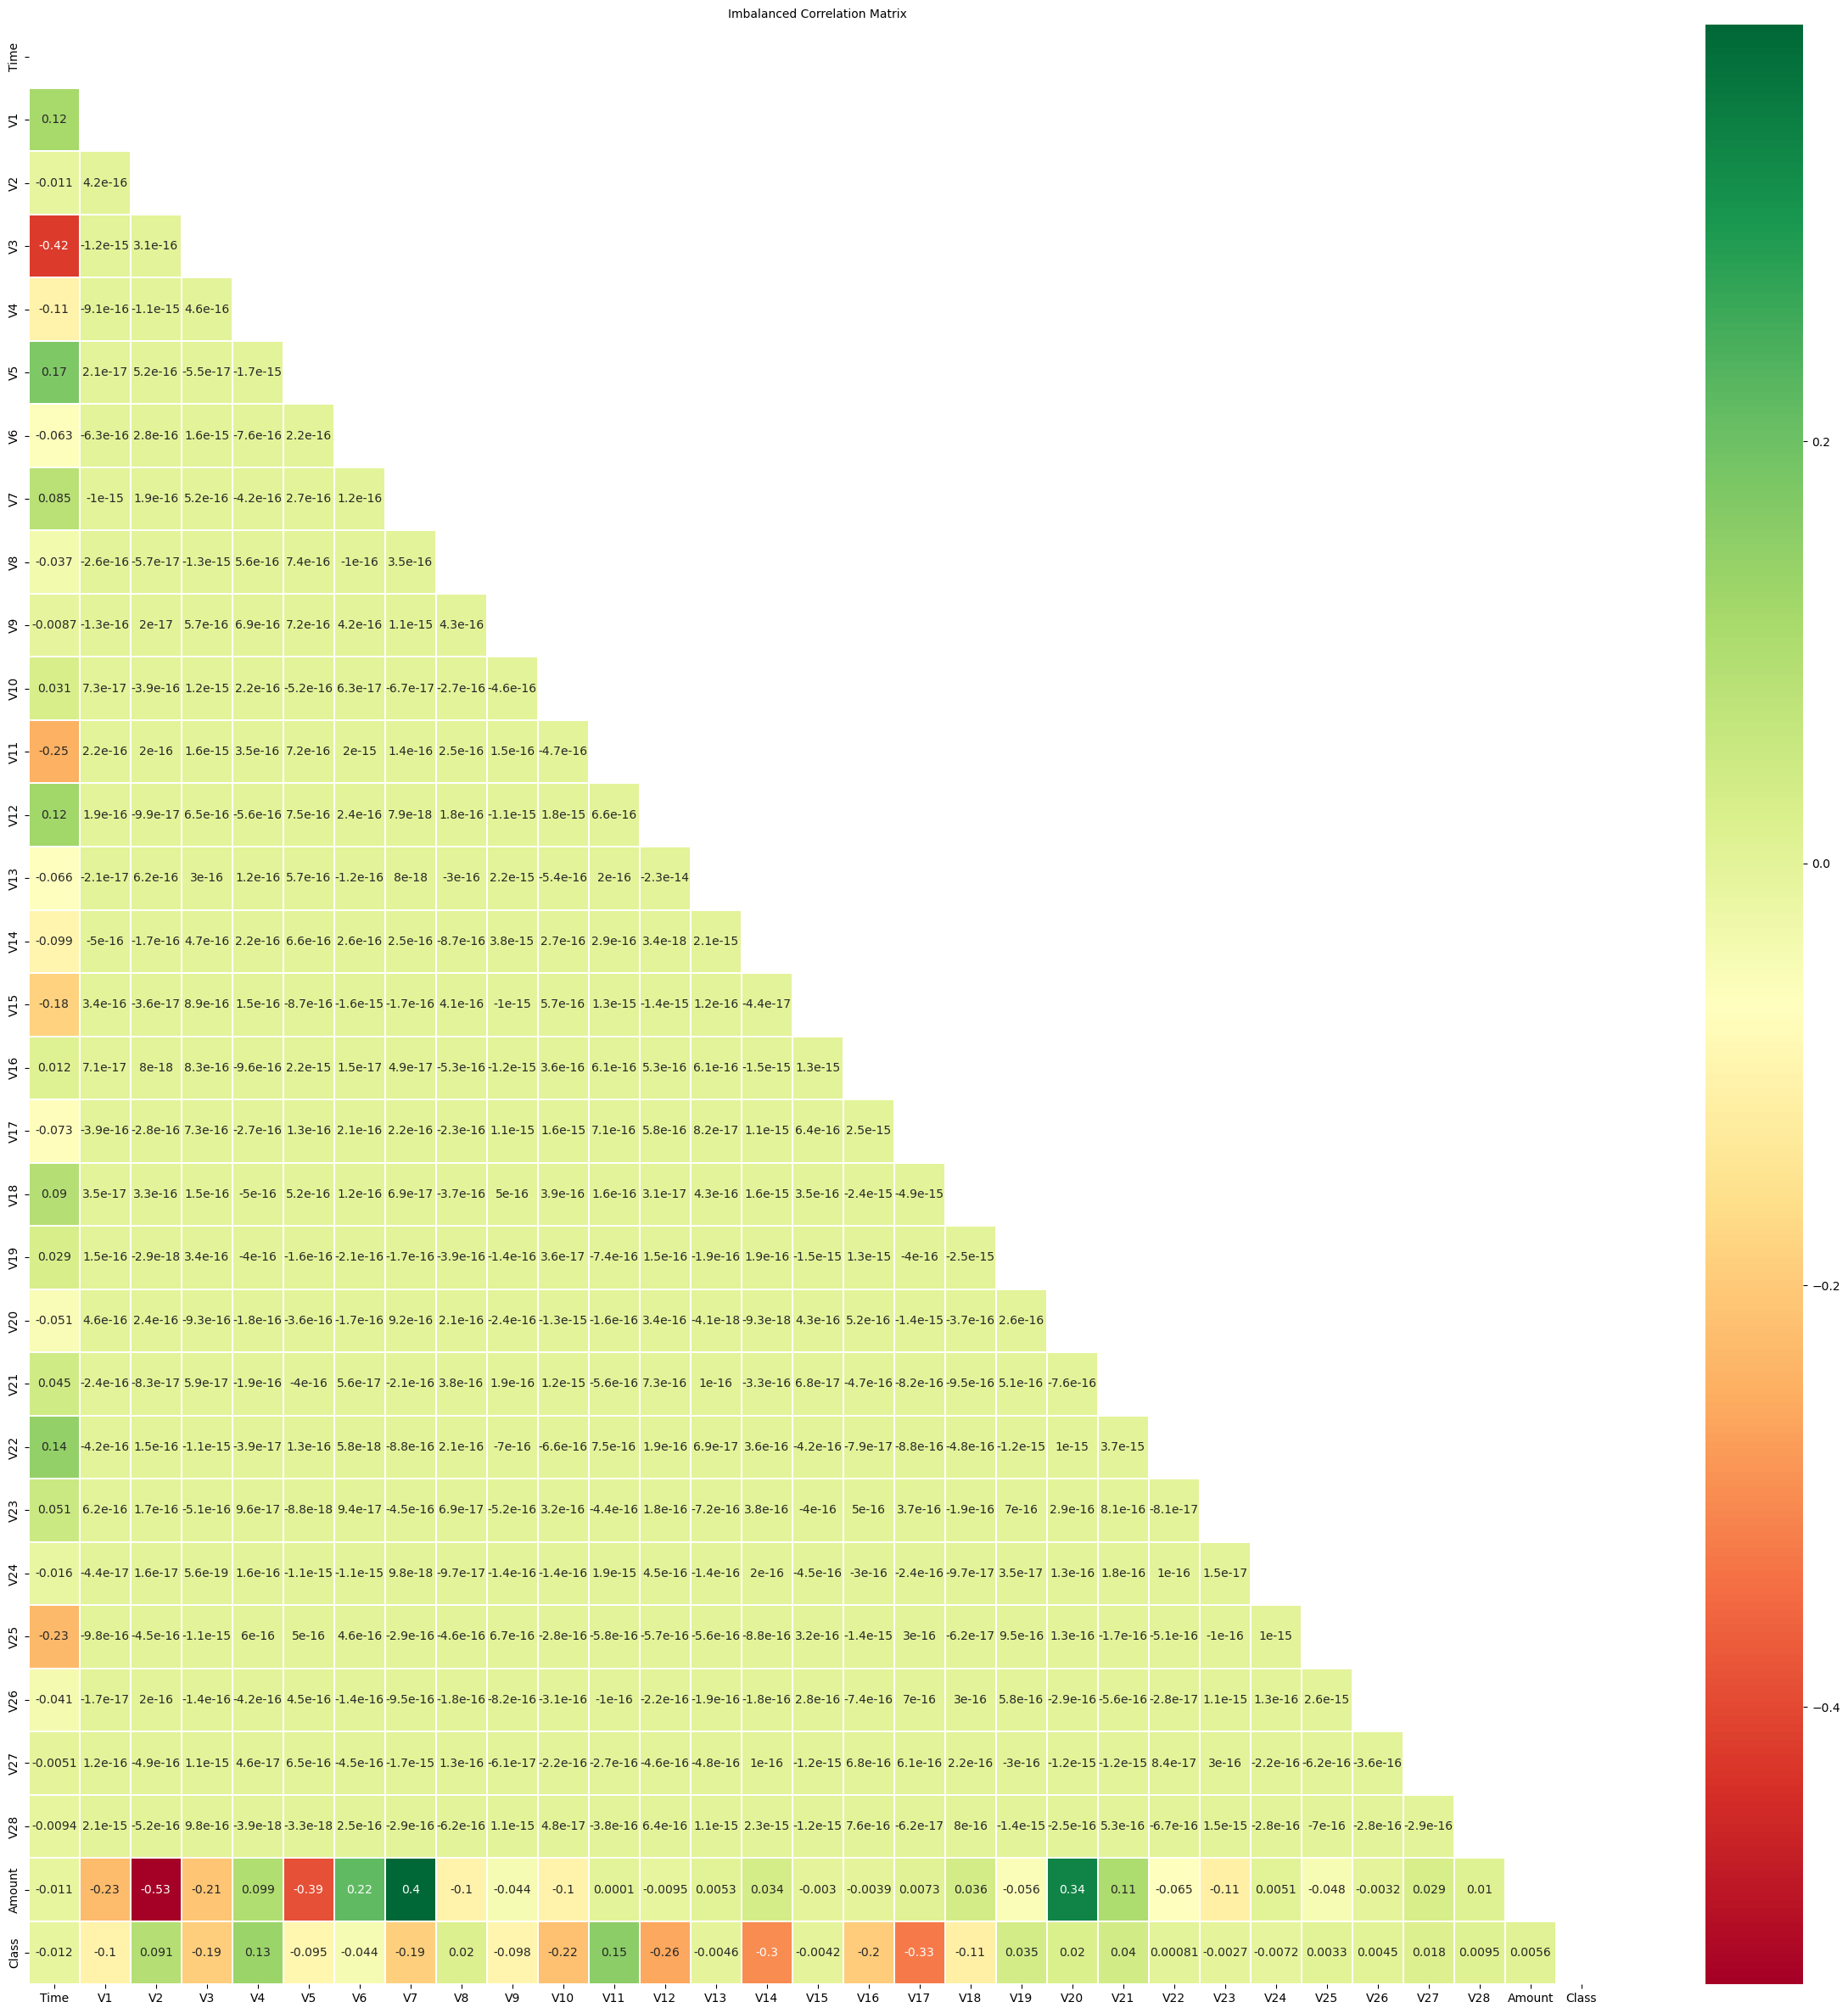

In [5]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 
plt.figure(figsize=(30,30))
plt.title('Imbalanced Correlation Matrix', fontsize=10)
sns.heatmap(corr, mask=mask, annot=True,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
plt.show()

Text(0.5, 1.0, 'V17 vs Class')

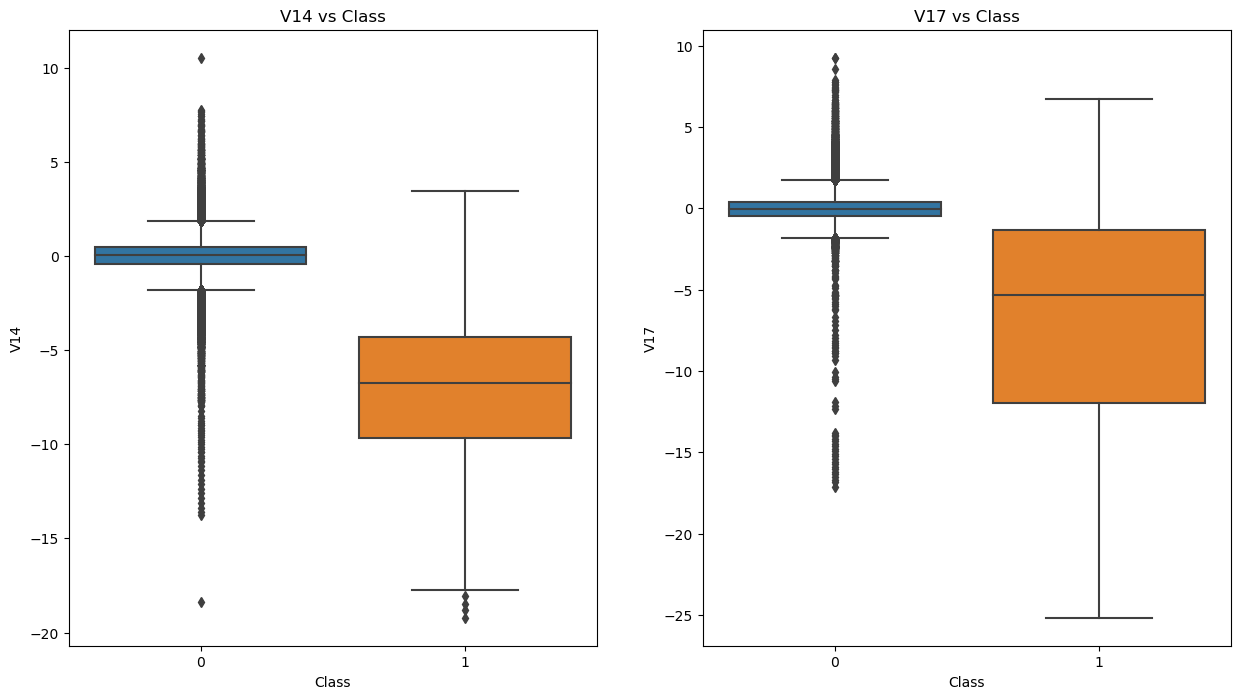

In [6]:
'''
IQR 
https://drhongdatanote.tistory.com/30 
'''

target_col = ['V14', 'V17']

f, axes = plt.subplots(ncols=2,figsize=(15,8))

sns.boxplot(x='Class', y=target_col[0], data=data, ax=axes[0])
axes[0].set_title(f'{target_col[0]} vs Class')

sns.boxplot(x='Class', y=target_col[1], data=data, ax=axes[1])
axes[1].set_title(f'{target_col[1]} vs Class')


In [7]:
data_copy = data.copy()

def remove_outlier(data, target_col):
    target_col_data = data[target_col]
    Q1 = np.percentile(target_col_data.values, 25)
    Q3 = np.percentile(target_col_data.values, 75)
    
    IQR = (Q3 - Q1) * 1.5
    lowest = Q1 - IQR 
    highest = Q3 + IQR 
    outlier_index = target_col_data[(target_col_data < lowest) | (target_col_data > highest)].index
    
    print(len(outlier_index))
    outlier_removed_data = data.drop(outlier_index, axis=0)
    print(outlier_removed_data.shape)
    
    return outlier_removed_data

v14_outlier_removed_data = remove_outlier(data_copy, 'V14')
v14_outlier_removed_data

14149
(270658, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
def metrics(y_test, predict):
    acc = accuracy_score(y_test, predict)
    precision = precision_score(y_test, predict)
    recall = recall_score(y_test, predict)
    f1 = f1_score(y_test, predict)
    roc_score = roc_auc_score(y_test, predict)
    
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(acc, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

def get_X_y_data(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0, stratify = y)
    return X_train, X_test, y_train, y_test

def modeling(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    metrics(y_test, pred)

X_train, X_test, y_train, y_test = get_X_y_data(data)

lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.74, 재현율 : 0.64
f1-score : 0.69, auc : 0.82


In [9]:
lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb,  X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.76
f1-score : 0.85, auc : 0.88


In [10]:
X_train, X_test, y_train, y_test = get_X_y_data(v14_outlier_removed_data)

lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb,  X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.33, 재현율 : 0.06
f1-score : 0.11, auc : 0.53
정확도 : 1.00, 정밀도 : 1.00, 재현율 : 0.06
f1-score : 0.12, auc : 0.53


Text(0.5, 1.0, 'V17')

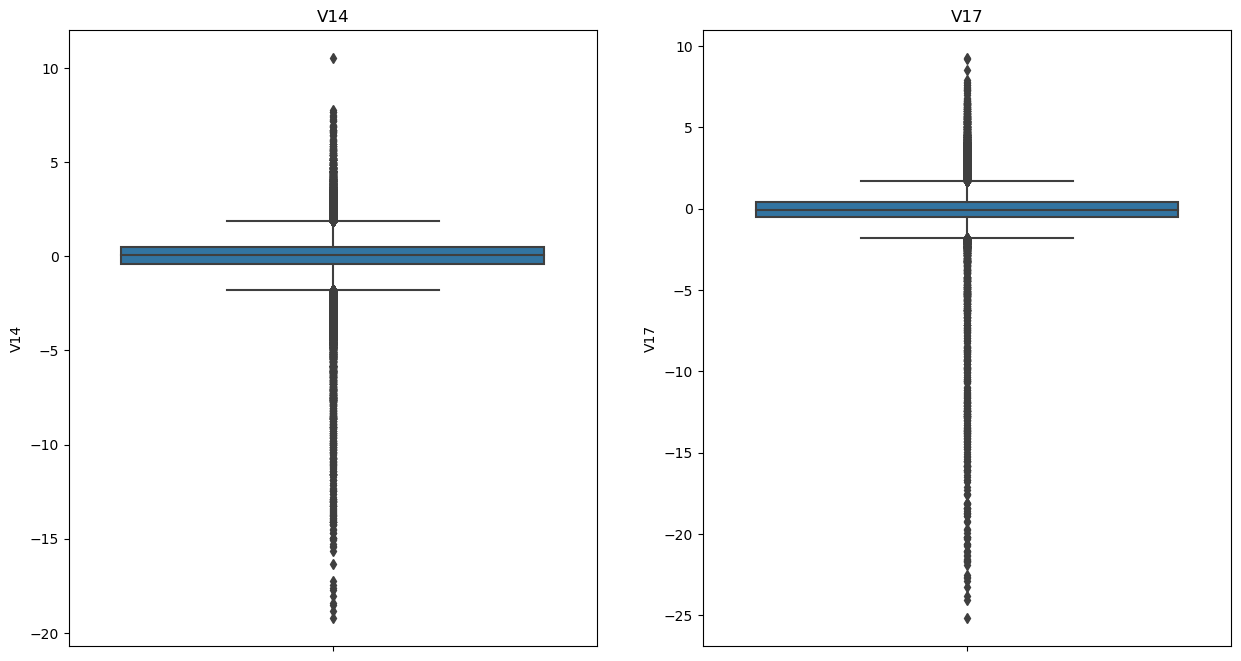

In [11]:
target_col = ['V14', 'V17']

f, axes = plt.subplots(ncols=2,figsize=(15,8))

sns.boxplot(y=target_col[0], data=data, ax=axes[0])
axes[0].set_title(f'{target_col[0]}')

sns.boxplot(y=target_col[1], data=data, ax=axes[1])
axes[1].set_title(f'{target_col[1]}')


Text(0.5, 1.0, 'V17 vs Class')

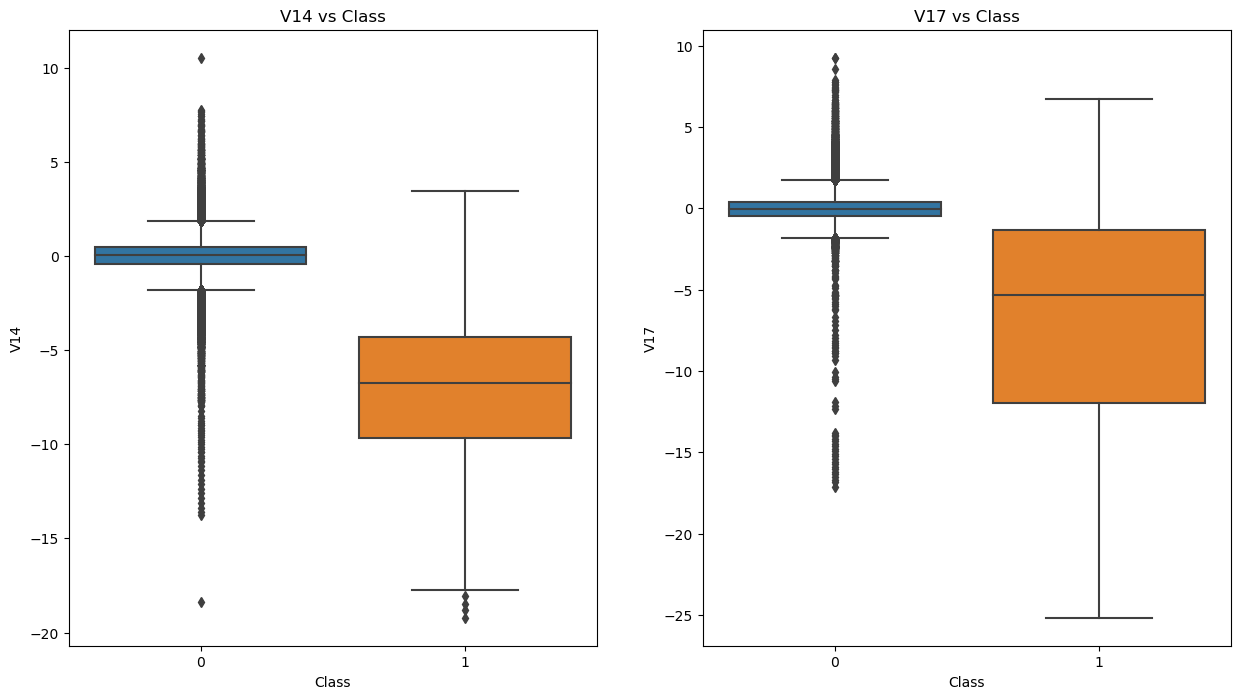

In [12]:
target_col = ['V14', 'V17']

f, axes = plt.subplots(ncols=2,figsize=(15,8))

sns.boxplot(x='Class', y=target_col[0], data=data, ax=axes[0])
axes[0].set_title(f'{target_col[0]} vs Class')

sns.boxplot(x='Class', y=target_col[1], data=data, ax=axes[1])
axes[1].set_title(f'{target_col[1]} vs Class')


In [13]:
data_copy = data.copy()

# v14_class0_outlier_removed_data = remove_outlier(data_copy[data_copy['Class'] == 0], 'V14')
'''This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0'''

data_copy = data.copy()

def remove_outlier(data, target_col, target_cls):
    target_col_data = data[data['Class'] == target_cls][target_col]
    Q1 = np.percentile(target_col_data.values, 25)
    Q3 = np.percentile(target_col_data.values, 75)
    
    IQR = (Q3 - Q1) * 1.5
    lowest = Q1 - IQR 
    highest = Q3 + IQR 
    outlier_index = target_col_data[(target_col_data < lowest) | (target_col_data > highest)].index
    
    print(len(outlier_index))
    outlier_removed_data = data.drop(outlier_index, axis=0)
    print(outlier_removed_data.shape)
    
    return outlier_removed_data

v14_class0_outlier_removed_data = remove_outlier(data_copy, 'V14', 0)
v14_class0_outlier_removed_data

13800
(271007, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
X_train, X_test, y_train, y_test = get_X_y_data(v14_class0_outlier_removed_data)

lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb,  X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.95, 재현율 : 0.82
f1-score : 0.88, auc : 0.91
정확도 : 1.00, 정밀도 : 1.00, 재현율 : 0.86
f1-score : 0.93, auc : 0.93


In [15]:
v14_class1_outlier_removed_data = remove_outlier(data_copy, 'V14', 1)

X_train, X_test, y_train, y_test = get_X_y_data(v14_class1_outlier_removed_data)

lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb,  X_train, X_test, y_train, y_test)

4
(284803, 31)
정확도 : 1.00, 정밀도 : 0.71, 재현율 : 0.59
f1-score : 0.64, auc : 0.79
정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.81
f1-score : 0.88, auc : 0.91


In [16]:
v17_class0_outlier_removed_data = remove_outlier(data_copy, 'V17', 0)

X_train, X_test, y_train, y_test = get_X_y_data(v17_class0_outlier_removed_data)

lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb,  X_train, X_test, y_train, y_test)

7038
(277769, 31)
정확도 : 1.00, 정밀도 : 0.97, 재현율 : 0.84
f1-score : 0.90, auc : 0.92
정확도 : 1.00, 정밀도 : 1.00, 재현율 : 0.87
f1-score : 0.93, auc : 0.93


In [21]:
v17_class1_outlier_removed_data = remove_outlier(data_copy, 'V17', 1)

X_train, X_test, y_train, y_test = get_X_y_data(v17_class1_outlier_removed_data)

lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

lgb = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
modeling(lgb,  X_train, X_test, y_train, y_test)

0
(284807, 31)
정확도 : 1.00, 정밀도 : 0.74, 재현율 : 0.64
f1-score : 0.69, auc : 0.82
정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.76
f1-score : 0.85, auc : 0.88


492
(284315, 31)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [47]:
'''
1번째 모델 아무 처리도 하지 않고 돌렸을 때 성능 (baseline model)

정확도 : 1.00, 정밀도 : 0.74, 재현율 : 0.64
f1-score : 0.69, auc : 0.82

정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.76
f1-score : 0.85, auc : 0.88
'''

'\n정확도 : 1.00, 정밀도 : 0.74, 재현율 : 0.64\nf1-score : 0.69, auc : 0.82\n\n정확도 : 1.00, 정밀도 : 0.96, 재현율 : 0.76\nf1-score : 0.85, auc : 0.88\n'